In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

In [2]:
data=pd.read_excel("CARGO_FOTP_DATASET.xlsx")

In [3]:
df=data.copy()

GOAL : Delay Prediction for cargo flights, Metric : %95 


In [ ]:
df.info()
df.head()

In [ ]:
df.describe()

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [ ]:
df.isna()

HEDEF 
* Ayları mevsimsel olarak kodlama
* Saatleri gün dilimlerine bölme (06-12 sabah, öğle, akşam, gece )
* Hedef değişkenini oluşturma 
* Encoding 
* X_train, X_test 



In [4]:
df['DELAYED'] = [1 if x>0 else 0 for x in df['TOT_DELAY_DURATION']]

In [5]:
df["LEG_DEP_GMT_DT"] = pd.to_datetime(df["LEG_DEP_GMT_DT"],format='%Y%m%d') 

In [6]:
df['LEG_DEP_GMT_DT'] = df['LEG_DEP_GMT_DT'].apply(lambda time: time.month)

In [7]:
df["LEG_ARR_GMT_DT"] = pd.to_datetime(df["LEG_ARR_GMT_DT"],format='%Y%m%d') 

In [8]:
df['LEG_ARR_GMT_DT'] = df['LEG_ARR_GMT_DT'].apply(lambda time: time.month)

In [9]:
df.shape

(99546, 29)

Target Variable : Delay 
Size : (99546, 29)
Variables: object -->19, int64 -->10
Missing Values 

In [ ]:
df.dtypes.value_counts().plot.pie()

In [ ]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

In [ ]:
df=df[df.columns[df.isna().sum()/df.shape[0]<0.6]]

In [ ]:
df.shape

Visualisation of Target Variable 
%63 delayed 
%36 non delayed 

In [ ]:
df["DELAYED"].value_counts(normalize=True)

Histogramme 

In [ ]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.distplot(df[col],kde=False)
    

In [ ]:
sns.pairplot(df,kind='hist')

In [ ]:
for col in df.select_dtypes('object'):
    print(f'{col:-<50}{df[col].nunique()}')

In [ ]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

In [ ]:
df_delayed=df[df['DELAYED']==1]
df_nondelayed=df[df['DELAYED']==0]

In [ ]:
df_delayed.head()

In [ ]:
#df["LEG_DEP_GMT_TM"] = pd.to_datetime(df["LEG_DEP_GMT_TM"],format='%H%m') 
#df['LEG_DEP_GMT_TM'] = df['LEG_DEP_GMT_TM'].apply(lambda time: time.hour)

In [ ]:
df.head()

In [ ]:
#df['LEG_DEP_GMT_TM_H'] = df['LEG_DEP_GMT_TM'].apply(lambda x: x.split(str(df['LEG_DEP_GMT_TM']),2))

In [10]:
df['LEG_ARR_GMT_TM'] = df['LEG_ARR_GMT_TM'].apply(lambda x: x//100)

In [11]:
df['LEG_DEP_GMT_TM'] = df['LEG_DEP_GMT_TM'].apply(lambda x: x//100)

In [ ]:
df.tail()

In [ ]:
#df=df.drop('LEG_DEP_GMT_TM_H',inplace=True,axis=1)

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [ ]:
df.head()

In [12]:
df['DELAY1_SUB_CODE'].nunique()

353

In [15]:
df['DELAY1_SUB_CODE'].unique()

array([nan, '64D', 'CF', '89Z', '56B', '63G', '64A', '36H', '64R', '09C',
       '31P', '22E', '22C', '57F', '89K', '65Z', '62D', '63J', '41A',
       '36B', '32A', '31B', '87Y', '31A', '31E', '42A', '55O', '31C',
       '99A', '21E', '32E', '26C', '72R', '37D', '68G', '63A', '68B',
       '41Q', '55A', '63D', '66H', '85F', '39F', '31D', '66A', '77B',
       '23A', '71R', '45D', '65Y', '61D', '04A', '21A', '41N', '62M',
       '35F', '46N', '31N', '68S', '63C', '92B', '96C', '13M', '36C',
       '51C', '86G', '95B', '63B', '86C', '37E', '95A', '35E', '65E',
       '63K', '86F', '51J', '86B', '63H', '09A', '61F', '88E', '67E',
       '21C', '64E', '02A', '58B', '65C', '62E', '51N', '93X', '36D',
       '81Z', '68D', '88D', '26A', '51B', '83R', '64B', '22A', '98F',
       '03A', '58A', '31S', '86J', '17X', '24A', '89X', '31H', '85Q',
       '67B', '87W', '22B', '32C', '89T', '43P', '41B', '86H', '16D',
       '61H', '65D', '31F', '83Z', '22N', '88A', '67R', '88B', '83O',
       '76C', '3

In [13]:
df['DELAY1_SUB_CODE'] = df['DELAY1_SUB_CODE'].replace(['93Z'],'CF')

In [16]:
df['DELAY1_SUB_CODE'] = df['DELAY1_SUB_CODE'].replace(['21A','21C','22A','22B','22C','22D','22E','22N','22O','23A','23C','23D','23E','24A','24B','24N','26A','26C','26T','27A','27C','28A','28B','28C','28D','31A','31B','31G','31N','31P','31S','32A','32B','32C','32D','32E','32G','32M','33A','33B','33C','33D','33E','34B','34C','34D','34E','34F','34N','35A','35B','35C','35D','35E','35G','35H','38A','38B','39A','39B','39C','39D','39E','39F','39G','39H','52A','52C'],'OP')

In [18]:
df['DELAY1_SUB_CODE'].unique()

array([nan, '64D', 'CF', '89Z', '56B', '63G', '64A', '36H', '64R', '09C',
       'OP', '57F', '89K', '65Z', '62D', '63J', '41A', '36B', '87Y',
       '31E', '42A', '55O', '31C', '99A', '21E', '72R', '37D', '68G',
       '63A', '68B', '41Q', '55A', '63D', '66H', '85F', '31D', '66A',
       '77B', '71R', '45D', '65Y', '61D', '04A', '41N', '62M', '35F',
       '46N', '68S', '63C', '92B', '96C', '13M', '36C', '51C', '86G',
       '95B', '63B', '86C', '37E', '95A', '65E', '63K', '86F', '51J',
       '86B', '63H', '09A', '61F', '88E', '67E', '64E', '02A', '58B',
       '65C', '62E', '51N', '93X', '36D', '81Z', '68D', '88D', '51B',
       '83R', '64B', '98F', '03A', '58A', '86J', '17X', '89X', '31H',
       '85Q', '67B', '87W', '89T', '43P', '41B', '86H', '16D', '61H',
       '65D', '31F', '83Z', '88A', '67R', '88B', '83O', '76C', '68O',
       '51H', '68F', '45N', '88O', '89S', '61B', '77A', '91O', '86O',
       '02B', '96S', '65N', '32S', '09B', '75H', '37G', '36G', '85A',
       '72A', '93

In [ ]:
df['DELAY1_SUB_CODE'].nunique()

In [19]:
df['DELAY1_SUB_CODE'] = df['DELAY1_SUB_CODE'].replace(['64D', '89Z', '56B', '63G', '64A', '36H', '64R', '09C',
     '57F', '89K', '65Z', '62D', '63J', '41A', '36B', '87Y',
       '31E', '42A', '55O', '31C', '99A', '21E', '72R', '37D', '68G',
       '63A', '68B', '41Q', '55A', '63D', '66H', '85F', '31D', '66A',
       '77B', '71R', '45D', '65Y', '61D', '04A', '41N', '62M', '35F',
       '46N', '68S', '63C', '92B', '96C', '13M', '36C', '51C', '86G',
       '95B', '63B', '86C', '37E', '95A', '65E', '63K', '86F', '51J',
       '86B', '63H', '09A', '61F', '88E', '67E', '64E', '02A', '58B',
       '65C', '62E', '51N', '93X', '36D', '81Z', '68D', '88D', '51B',
       '83R', '64B', '98F', '03A', '58A', '86J', '17X', '89X', '31H',
       '85Q', '67B', '87W', '89T', '43P', '41B', '86H', '16D', '61H',
       '65D', '31F', '83Z', '88A', '67R', '88B', '83O', '76C', '68O',
       '51H', '68F', '45N', '88O', '89S', '61B', '77A', '91O', '86O',
       '02B', '96S', '65N', '32S', '09B', '75H', '37G', '36G', '85A',
       '72A', '93Y', '66F', '66G', '42B', '41E', '96H', '43C', '52P',
       '36F', '87Z', '55B', '25C', '32F', '57E', '67D', '96D', '63X',
       '81Y', '82W', '66D', '96G', '89V', '89G', '68N', '25A', '35I',
       '89Y', '41C', '67A', '63F', '55U', '87G', '83T', '64C', '71A',
       '75A', '55D', '65R', '52F', '85S', '44A', '87H', '86A', '55C',
       '75B', '87J', '94B', '87R', '55S', '82Y', '89M', '98N', '01A',
       '93V', '51A', '36K', '57D', '93W', '91N', '51E', '86X', '82Q',
       '82Z', '22X', '82X', '93U', '01B', '01Y', '63L', '24Y', '01C',
       '01D', '57A', '84A', '25B', '45A', '56A', '96F', '41P', '88P',
       '96X', '89L', '01E', '86D', '56D', '96N', '23B', '96T', '96E',
       '41D', '01X', '26X', '95C', '29B', '96A', '38C', '52N', '65B',
       '77C', '62B', '24X', '62N', '03B', '16N', '85P', '83U', '36A',
       '41S', '98L', '41R', '33X', '29A', '64H', '88C', '56E', '36E',
       '83S', '32X', '46E', '89U', '72B', '63M', '87K', '83Y', '41X',
       '97D', '98E', '57B', '39X', '83V', '98D', '21X', '61I', '85T',
       '75C', '86N', '88Q', '72X', '52K', '51D', '89R', '89N', '66B',
       '73R', '43N', '98B', '17P', '52B', '17A', '82V', '73A', '51X',
       '36X', '51K', '71X', '23X', '85H', '89J', '44C', '66E', '41O',
       '11O', '76A', '73B', '73Z'],'2')

<AxesSubplot:>

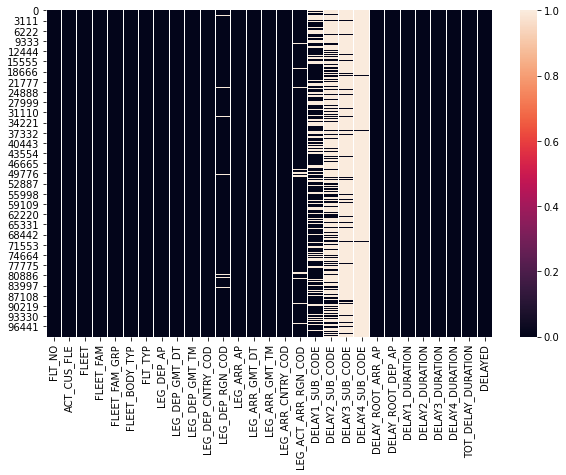

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna())

In [ ]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.distplot(df_delayed[col], label="delayed")
    sns.distplot(df_nondelayed[col], label="non delayed")

In [28]:
df.shape

(99546, 29)

In [35]:
df['DELAY1_SUB_CODE'] = df['DELAY1_SUB_CODE'].replace(np.NAN,'ND')

In [36]:
df['DELAY1_SUB_CODE'].unique()

array(['ND', 'GN', 'CF', 'OP'], dtype=object)